In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv('Mall_Customers.csv')

In [14]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.drop(['CustomerID','Genre','Age'],axis=1,inplace=True)

In [16]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


F:\mandar_soft\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


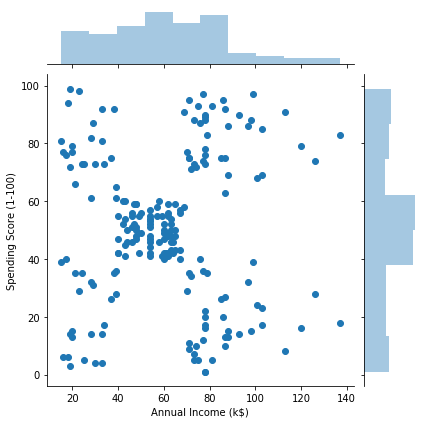

In [19]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=2, init = "k-means++")
kmeans.fit(df)
kmeans.inertia_

181363.59595959596

In [27]:
sse = []

for i in range(1,11):
    k = KMeans(n_clusters=i)
    k.fit(df)
    sse.append(k.inertia_)

In [28]:
sse

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30227.606513152015,
 25043.890043290045,
 22131.92051101073,
 19643.655552199736]

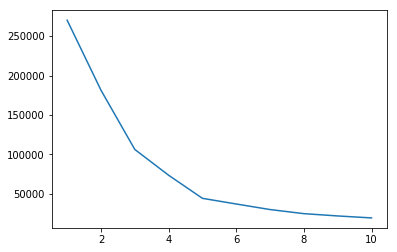

In [29]:
plt.plot(range(1,11),sse)

In [30]:
k = KMeans(n_clusters=5,init = "k-means++")
k.fit(df)
ykmeans = k.fit_predict(df)

In [31]:
ykmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [34]:
X = df.values

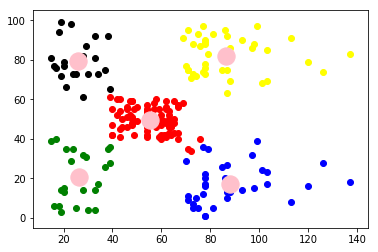

In [40]:
plt.scatter(X[ykmeans==0,0],X[ykmeans==0,1], c = 'red')
plt.scatter(X[ykmeans==1,0],X[ykmeans==1,1], c = 'yellow')
plt.scatter(X[ykmeans==2,0],X[ykmeans==2,1], c = 'black')
plt.scatter(X[ykmeans==3,0],X[ykmeans==3,1], c = 'blue')
plt.scatter(X[ykmeans==4,0],X[ykmeans==4,1], c = 'green')
plt.scatter(centroid[:,0], centroid[:,1], c = 'pink', s = 300)

In [38]:
centroid = k.cluster_centers_